Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Set style for plots
sns.set(style="whitegrid")

In [2]:
# Load the CSV file
df = pd.read_csv("students.csv")

# Preview the data
df.head()

# Check info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        268 non-null    object 
 1   region           268 non-null    object 
 2   gender           268 non-null    object 
 3   academic         268 non-null    object 
 4   age              268 non-null    float64
 5   age_cate         268 non-null    float64
 6   stay             268 non-null    float64
 7   stay_cate        268 non-null    object 
 8   japanese         268 non-null    float64
 9   japanese_cate    268 non-null    object 
 10  english          268 non-null    float64
 11  english_cate     268 non-null    object 
 12  intimate         260 non-null    object 
 13  religion         268 non-null    object 
 14  suicide          268 non-null    object 
 15  dep              270 non-null    object 
 16  deptype          271 non-null    object 
 17  todep           

inter_dom          18
region             18
gender             18
academic           18
age                18
age_cate           18
stay               18
stay_cate          18
japanese           18
japanese_cate      18
english            18
english_cate       18
intimate           26
religion           18
suicide            18
dep                16
deptype            15
todep              18
depsev             13
tosc               18
apd                18
ahome              18
aph                18
afear              18
acs                18
aguilt             18
amiscell           18
toas               18
partner            18
friends            18
parents            18
relative           18
profess            18
 phone             18
doctor             18
reli               18
alone              18
others             18
internet           44
partner_bi          3
friends_bi          3
parents_bi         14
relative_bi        14
professional_bi    14
phone_bi           14
doctor_bi 

In [3]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Convert categorical columns
df['inter_dom'] = df['inter_dom'].astype('category')
df['stay'] = df['stay'].astype('category')

# Fill missing numeric values safely
df['todep'] = df['todep'].fillna(df['todep'].median())
df['tosc']  = df['tosc'].fillna(df['tosc'].median())
df['toas']  = df['toas'].fillna(df['toas'].median())

In [4]:
# Filter for inter_dom = 'Inter'
df_inter = df[df['inter_dom'] == 'Inter']

# Group by 'stay' and calculate count and averages
summary = df_inter.groupby('stay', observed=False).agg(
    count_int=('stay', 'count'),
    average_phq=('todep', 'mean'),
    average_scs=('tosc', 'mean'),
    average_as=('toas', 'mean')
).reset_index()

# Round the averages
summary[['average_phq','average_scs','average_as']] = summary[['average_phq','average_scs','average_as']].round(2)

# Display
summary

,stay,count_int,average_phq,average_scs,average_as
0,1.0,95,7.48,38.11,72.80
1,2.0,39,8.28,37.08,77.67
2,3.0,46,9.09,37.13,78.00
3,4.0,14,8.57,33.93,87.71
4,5.0,1,0.00,34.00,91.00
5,6.0,3,6.00,38.00,58.67
6,7.0,1,4.00,48.00,45.00
7,8.0,1,10.00,44.00,65.00
8,10.0,1,13.00,32.00,50.00


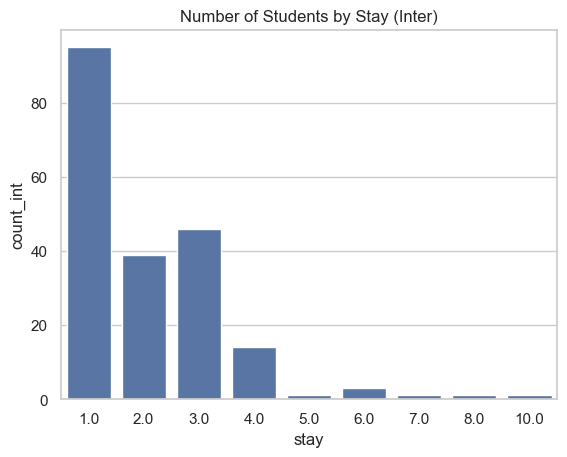

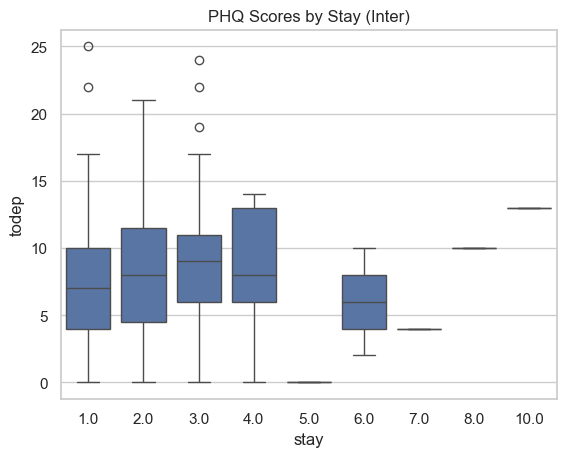

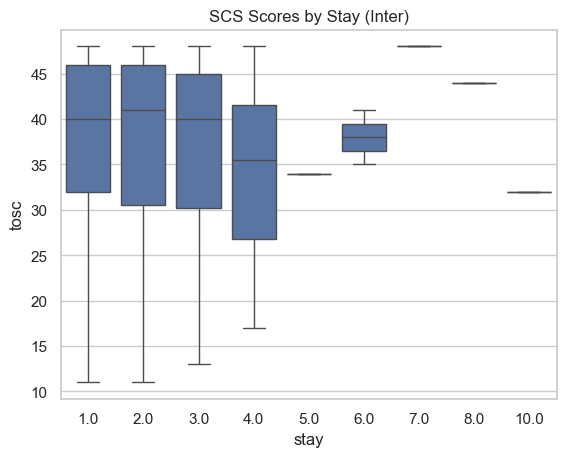

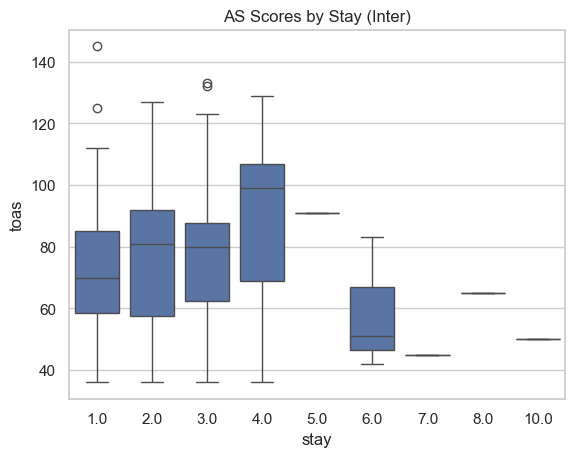

In [5]:
# 1. Bar plot of number of students per stay
sns.barplot(x='stay', y='count_int', data=summary)
plt.title('Number of Students by Stay (Inter)')
plt.show()

# 2. Boxplot: PHQ scores by stay
sns.boxplot(x='stay', y='todep', data=df_inter)
plt.title('PHQ Scores by Stay (Inter)')
plt.show()

# 3. Boxplot: SCS scores by stay
sns.boxplot(x='stay', y='tosc', data=df_inter)
plt.title('SCS Scores by Stay (Inter)')
plt.show()

# 4. Boxplot: AS scores by stay
sns.boxplot(x='stay', y='toas', data=df_inter)
plt.title('AS Scores by Stay (Inter)')
plt.show()